In [6]:
# standard.

import pandas as pd
from pandas import Series, DataFrame

In [7]:
# reading the data from csv file

titanic_df = pd.read_csv('train.csv')

# preview of data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# quick grab of data

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Questions

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?



Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?



So let's start with the first question: Who were the passengers on the titanic?

In [9]:
# plotting library

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

TypeError: unsupported operand type(s) for /: 'str' and 'long'

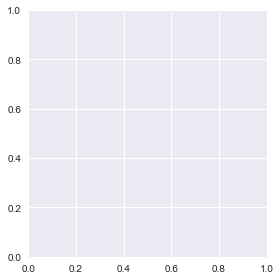

In [10]:
# quick look at the sex of people on the titanic

""" we will use factor plot for this which takes a coloum name and divide on the basis of the avaliable data. """

sns.factorplot('Sex', data=titanic_df)

TypeError: unsupported operand type(s) for /: 'str' and 'long'

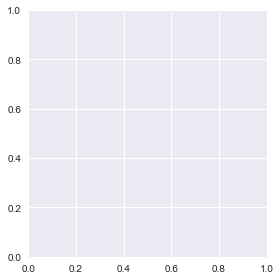

In [11]:
# Male and female in each class

sns.factorplot('Sex', data=titanic_df, hue='Pclass')

TypeError: argument 2 to map() must support iteration

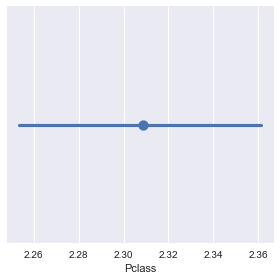

In [12]:
# better way

sns.factorplot('Pclass', data=titanic_df, hue='Sex')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children. How can we go about this?

In [13]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column


def male_female_child(passenger):
    
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    
# creating a passenger coloumn in the titanic_df

# since it is a coloumn and not index we need to set axis to 1
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [14]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


TypeError: argument 2 to map() must support iteration

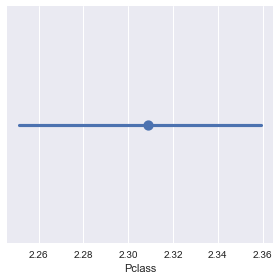

In [15]:
# factor plot for person

sns.factorplot("Pclass", data=titanic_df, hue="Person")

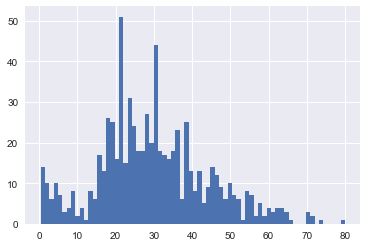

In [16]:
# hist plot of ages

titanic_df['Age'].hist(bins=70)

In [17]:
# find the mean age

titanic_df['Age'].mean()

29.69911764705882

In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [19]:
# removinf a coloumn from data frame

titanic_df.drop('person', axis=1, inplace=True)

ValueError: labels ['person'] not contained in axis

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [21]:
# to get details of each individual sex in person

titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

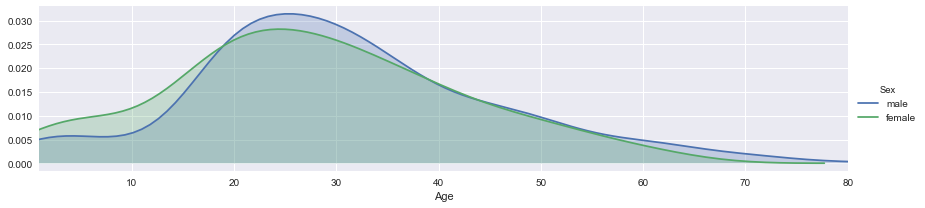

In [22]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas 
# dataframe as its data source, set the hue, and change the aspect ratio.

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(1, oldest))

fig.add_legend()

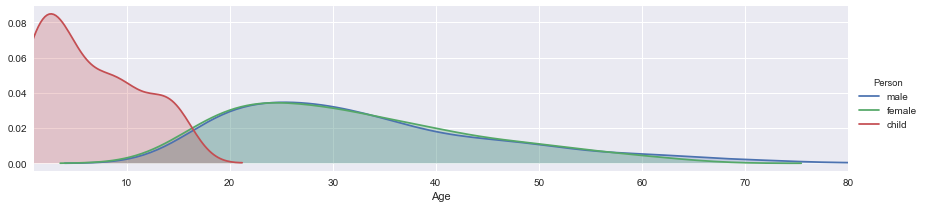

In [23]:
# similary plotting for person

fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(1, oldest))

fig.add_legend()

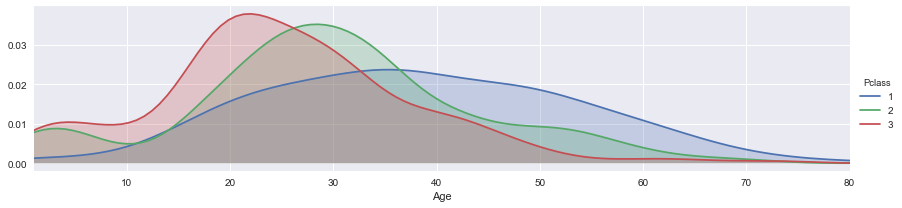

In [24]:
# similary plotting for class

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(1, oldest))

fig.add_legend()

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [26]:
# First we'll drop the NaN values and create a new object, deck

deck = titanic_df['Cabin'].dropna()

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

TypeError: unsupported operand type(s) for /: 'str' and 'long'

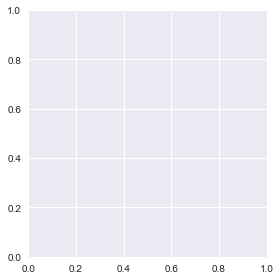

In [27]:
# We need only first letter in the deck not we will remove the rest of the data

levels = []

# grabbing the First letter 
for i in deck:
    levels.append(i[0])
    
# Make a cabin dataFrame
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabins']

sns.factorplot('Cabins', data=cabin_df, palette='winter_d')

TypeError: unsupported operand type(s) for /: 'str' and 'long'

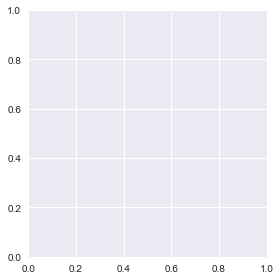

In [28]:
# Redefine cabin_df as everything but where the row was equal to 'T'

cabin_df = cabin_df[cabin_df.Cabins != 'T']

sns.factorplot('Cabins', data=cabin_df, palette='summer')


Now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

3.) Where did the passengers come from?

In [ ]:
# Factor plot of where people came from.

''' plot tells how many people came from which places and which class '''

# by using x_order we can remove the nan plots
sns.factorplot('Embarked', data=titanic_df, x_order=['C', 'Q', 'S'], hue='Pclass', aspect=2)


An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:

4.) Who was alone and who was with family?

In [92]:
# Adding alone column

titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [93]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,With family


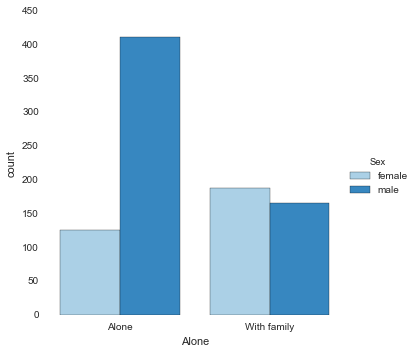

In [96]:
# plotting 

sns.factorplot('Alone', data=titanic_df, palette='Blues', hue='Sex')

Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

In [99]:
# Making a survivor column using surivived values

titanic_df['survivor'] = titanic_df.Survived.map({0: 'No', 1:"Yes"})

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,No
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,No
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone,No
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With family,No
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With family,Yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,With family,Yes


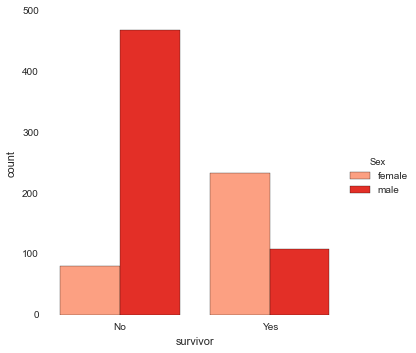

In [101]:
# survival of men and women

sns.factorplot('survivor', data=titanic_df, palette='Reds', hue='Sex')

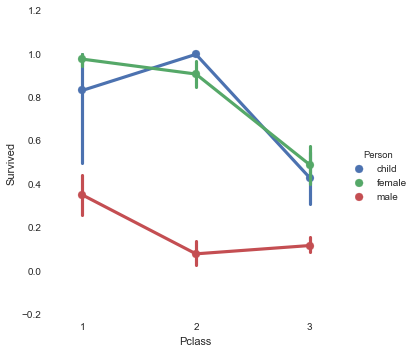

In [109]:
# survival based on class

#sns.factorplot('survivor', data=titanic_df, palette='Reds', hue='Pclass')

sns.factorplot('Pclass', 'Survived', data=titanic_df)

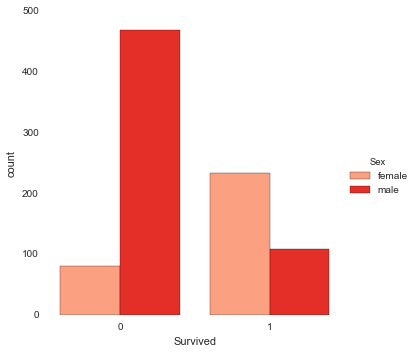

In [108]:
sns.factorplot('Survived', data=titanic_df, palette='Reds', hue='Sex')

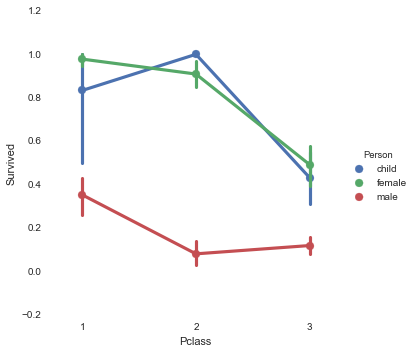

In [110]:
# unfavouriable conditions for survival.

sns.factorplot('Pclass', 'Survived', data=titanic_df, hue='Person')


From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

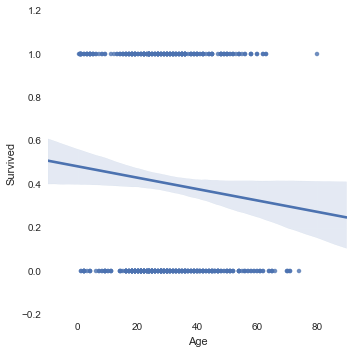

In [111]:
sns.lmplot('Age', 'Survived', data=titanic_df)


Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

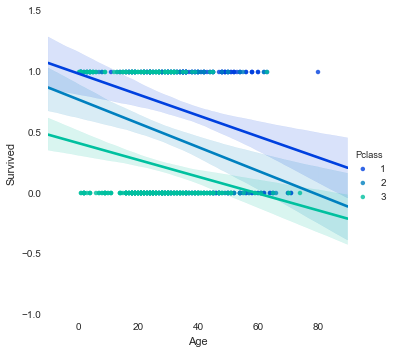

In [112]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')


We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

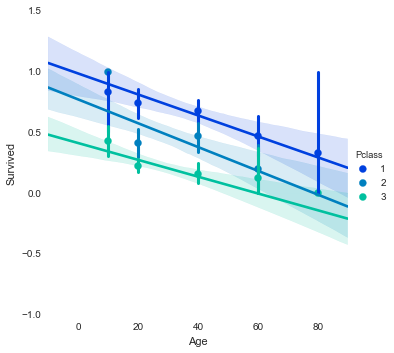

In [114]:
# cleaning up the plot

generations = [10, 20, 40, 60, 80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter', x_bins=generations)

 What about if we relate gender and age with the survival set?

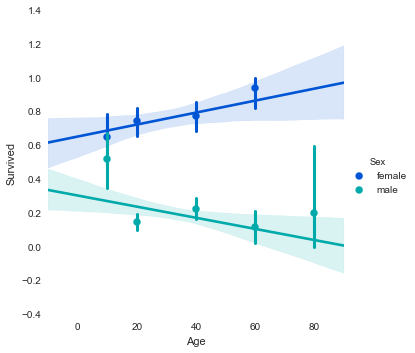

In [115]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter', x_bins=generations)

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

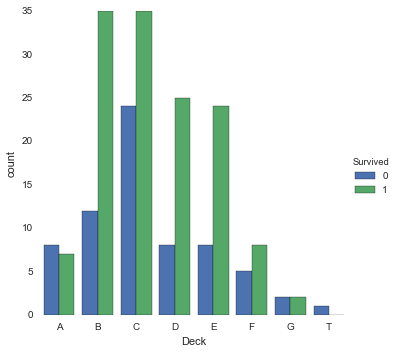

In [168]:
# concatinating the data frames

deck = []

for i in titanic_df['Cabin']:
    
    if str(i) == 'NaN':
        deck.append(0)
    else:
        deck.append(str(i)[0])
        
titanic_df['Deck'] = deck

sns.factorplot('Deck', x_order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], data=titanic_df, hue='Survived')

2.) Did having a family member increase the odds of surviving the crash?

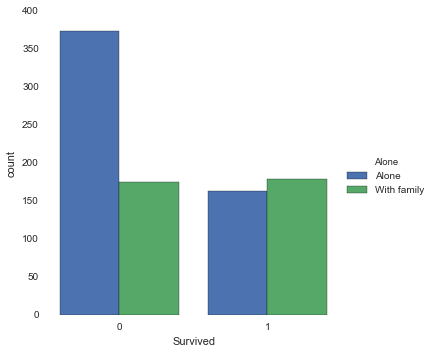

In [123]:
sns.factorplot('Survived', data=titanic_df, hue='Alone')

In [125]:
titanic_df['Alone'].value_counts()

Alone          537
With family    354
dtype: int64

In [130]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')